#Q1 Building the model

$p(S1) =N(s1,\mu_{s_1},\Sigma_{s_1})$

$p(S2) =N(s2,\mu_{s_2},\Sigma_{s_2})$   

$p(t|s) = N(t, s_1-s_2 , \Sigma_{t})$  

$p(y|t) = sign(t)$

$p(s_1,s_2,t,y) = p(s_1)p(s_2)p(t|s_1,s_2)p(y|t)$
_________________________

#Q2.Conditional independence:


$p(s,y|t)= \frac{p(s)p(s|t)p(t)p(y|t)}{p(s)P(t)} $

$p(s,y|t) = p(s|t)p(y|t)$ 

so 
$s ⊥ y|t $

*Refrence-> Lec1 p(29/33)

# Q.3 Computing with the model (Lecture 2)

In [1]:
import numpy as np
import math
import scipy.stats
import matplotlib.pyplot as plt
from scipy.integrate import quad
import pandas as pd


In [2]:
#needed Variables for calculations

A = np.array([1,-1])
b =0
t=3
co_s= np.array([[1,0],[0,4]])
co_ts = 5
A_trans= A[:,None]
#A_trans= np.transpose(A)
Ms= np.array([1,-1])
Ms_trans = Ms[:,None]





## Part 1:
###Gauss Corollary1 (Affine transformation – conditional)

$p(s)= N(s ,M_s, \Sigma_s )$   
$p(t|s) = N(t; A s+b , \Sigma_{t\vert s} )$

Then the conditional distribution of $x_s$ given $x_t$ is 

$p(s|t)= N(s; μ_{s|t} ,\Sigma_{s\vert t}  )$
 
with

$\Sigma_{s\vert t} = (\Sigma_{s}^{-1} + A^T \Sigma_{t|s}^{-1} A )^ {-1} $

$μ_{s|t} = \Sigma_{s\vert t} (\Sigma_{s}^{-1} μ_s + A^T \Sigma_{t|s}^{-1} (t −b))$



In [3]:
#segma_s|t for conditional distribution
co_st = np.linalg.inv(np.linalg.inv(co_s) + (A_trans* (1/co_ts)*A))

In [4]:
#Mu_s|t for conditional distribution
term1= np.linalg.inv(co_s)@Ms_trans
term2= A_trans *(1/co_ts) * t

M_st= co_st@(term1+ term2)

In [5]:
print("Mu_s|t = ",M_st)
print("segma_s|t =",co_st)

Mu_s|t =  [[ 1.1]
 [-1.4]]
segma_s|t = [[0.9 0.4]
 [0.4 2.4]]


## Part 2:
###Truncated Gaussian

$p(t|s_1,s_2,y) = p(y|t) p(t|s_1, s_2)$

$p(y|t)= sign(t)$

$p(t|s_1, s_2) = N(t; s_1 - s_2 , \sigma_{t}^2 )$

Given that $s_1 = 2 , s_2 = 1 , \sigma_t ^{2} = 5$ so 

$$
p(t|s_1,s_2,y)=
  \begin{cases}
    N(t; 1 , 5 )       & \quad \text{if }0 < t< \infty \\
    0  & \quad \text otherwise
  \end{cases}
$$


## Part 3:
###Corollary 2 (Affine transformation – Marginalization):


The target is to find $p(y=1) = p(t>0)$

In order to get $p(t>0)$ we use Gauss corollay2:

$p(s) = N( s; μ_s, \Sigma_s) $

$p(t| s) = N(t; A s + b, \Sigma_{t|s}) $

Then $p(t) = N(t; \mu_t , \Sigma_{t})$ 

$\mu_t = A \mu_s + b $

$\Sigma_t = \Sigma_{t|s} + A\Sigma_s A^T$

Then $get p(t>0) = \int_{\inf}^{0} p(t) \,dt $

<!-- Theorem 3 (Affine transformation): 
*$p(s) = N( s; μ_s, \Sigma_s) $  

*$p(t| s) = N(t; A s + b, \Sigma_{t|s}) $

$P(s,t)= N(\begin{bmatrix}
s \\
t
\end{bmatrix} , \begin{bmatrix}
μ_s \\
Aμ_s+b
\end{bmatrix}, R )$

$$R = \begin{bmatrix}
\Sigma_a & \Sigma_a A^T\\
A \Sigma_a & \Sigma_{b|a} + A \Sigma_a A^T
\end{bmatrix}
$$ -->


<!-- ______________________________
###Theorem 1 (Conditioning):
Now we have $p(s,t)$ from theorem 1 we can get $p(t) $

$p(s,t) = \begin{bmatrix}
t\\
s
\end{bmatrix}
$ , 

$\mu = \begin{bmatrix}
\mu_t  \\
\mu_s
\end{bmatrix}
$

$\Sigma = \begin{bmatrix}
\Sigma_{tt} & \Sigma_{ts} \\
\Sigma_{st} & \Sigma_{ss}
\end{bmatrix}
$

The marginal distribution $p(t)$ is then given by

$p(t) = N(t; μ_t, \Sigma_{tt}) .$ -->

In [6]:
#Calculate p(t)
Mt_2 = (A@Ms) + b
co_t2 = co_ts + (A@co_s@A_trans)
# print("Mb_2 = ",Mt_2)
# print("co_b2=",co_t2)

#Calculate the integration for positive t
lowerbound = 0
upperbound = np.inf

# generate Gaussian function
def gauss(tt, mean, std): # REVISION
    return scipy.stats.norm.pdf(tt, mean, std) # REVISION 

mean = Mt_2 # REVISION
std = np.sqrt(co_t2) # REVISION

# integrate between bounds
integral = scipy.integrate.quad(gauss, lowerbound, upperbound, args=(mean, std)) # REVISION
print(integral)


(0.736455371567231, 4.947251011234974e-09)


In [7]:
# def normal_dist(x , mean , sd):
#     term1 = 1/(math.sqrt(2*np.pi*sd))
#     term2 = - 0.5 * ((x-mean)**2 )/ sd
#     prob_density = term1 * np.exp(term2)
#     #prob_density = (1/(math.sqrt(2*np.pi*sd))) * np.exp(-0.5*((x-mean)/sd)**2)
#     return prob_density

# normal_dist(t,Mb_2,co_b2_r)

#Q4. Bayesian Network

##Designed bayesian Network for the model :

<img src='https://drive.google.com/uc?id=1urEGrkVWd4y7SWCFm8VKgRWlnPkf21eT' width="200px">


*Refrence -> Lec 6 p(23/34)

##Prov:

Notice that t is observed 

$$
\begin{equation}
\begin{split}
P(s,y|t) & = \frac{p(s,y,t)}{p(t)} \\
 & = \frac{p(y|t)p(s|t)p(s)}{p(t)} \\
& = p(y|t)p(s|t)
\end{split}
\end{equation} $$

##Q5.
From Q3 we have:

$p(s|t)= N(s; \begin{bmatrix}
1.1\\
-1.4
\end{bmatrix} ,\begin{bmatrix}
0.9 & 0.4 \\
0.4 & 2.4
\end{bmatrix}  )$

$$
p(t|s_1,s_2,y)=
  \begin{cases}
    N(t; 1 , 5 )       & \quad \text{if }0 < t< \infty \\
    0  & \quad \text otherwise
  \end{cases}
$$

$p(t) = N(t; 2 , 10)$ 


requirement:
p(s1, s2|y) = Gibbs sampler()

In [8]:
import scipy.stats as stats #REV
import matplotlib.pyplot as plt

#Algorithm:
#1- i= 1,2,3,...k
#2- simulate 
#S_1(i+1) = p(s_1_i|t_i)
#S_2(i+1) = p(s_2_i|t_i)
#t(i+1) = p(t_i|s_1_i,s_2_i,y)

#initialization of variables
#s_1 and S_2 has same variables
segma_s1 = 25/3
segma_s2 = 25/3

mu_s1 = 25
mu_s2 = 25
segma_t = 25/6

co_s = [[segma_s1**2,0],[0,segma_s2**2]]
A = np.array([1,-1]) # REV
A_trans = A[:, None]
co_ts = 5
Ms= np.array([mu_s1,mu_s2])
Ms_trans=Ms[:, None]

n_iterations = 1000

y=1
s_1 = np.zeros(n_iterations)
s_2 = np.zeros(n_iterations)
t = np.zeros(n_iterations)

#Gibbs Function
def Gibbs(mu_s1,mu_s2,segma_t,y,n_iterations, co_s , A, co_ts, A_trans, Ms_trans): ## REVISION (y,n_iterations,s_1,s_2,co_s,A,co_ts,A_trans,Ms_trans)
    #output from iterations
    s_1 = np.zeros(n_iterations)
    s_2 = np.zeros(n_iterations)
    t = np.zeros(n_iterations)
    s_1[0] = mu_s1
    s_2[0] = mu_s2
    for i in range(n_iterations-1):
      t[i+1] = t_trunc(i, y, segma_t, s_1, s_2)
      s_1[i+1] , s_2[i+1] = p_st(i, t[i+1], co_s, A, co_ts, A_trans, Ms_trans) #REV
    return s_1, s_2, t 
      
#Calculate t_i in order to use it in calculating the postirior p(s|t)
def t_trunc(i, y, segma_t, s_1, s_2): # REV
     if y==1:
        t_t= stats.truncnorm.rvs(a=0, b= np.inf,loc = s_1[i] - s_2[i], scale= segma_t , size=1) #REV ## ASK IT --  TA.
     elif y== -1:
        t_t= stats.truncnorm.rvs(a=- np.inf, b=0 ,loc = s_1[i] - s_2[i] , scale= segma_t , size=1) ##ASK TA
     return t_t
         
def p_st(i,t,co_s,A,co_ts,A_trans,Ms_trans): #REV
    #segma_s|t for conditional distribution
    co_st = np.linalg.inv(np.linalg.inv(co_s) + (A_trans* (1/co_ts**2)*A))
    #Mu_s|t for conditional distribution
    term1= np.linalg.inv(co_s)@Ms_trans
    term2= A_trans* (1/co_ts**2) * t
    M_st= co_st@(term1+ term2)
    #s_1,s_2 = N(s_1,s_2;Mu_st;Segma_st)
    flat_M_st=np.ravel(M_st)
    S_1, S_2 = np.random.multivariate_normal(np.ravel(M_st), co_st) #REV
    return S_1, S_2 # REV

def gauss_posterior(x_post, S1, S2):
  m_s1_post = np.mean(S1)
  std_s1_post = np.std(S1)

  m_s2_post = np.mean(S2)
  std_s2_post = np.std(S2)

  S1_gauss_post = stats.norm.pdf(x_post, m_s1_post, std_s1_post)
  S2_gauss_post = stats.norm.pdf(x_post, m_s2_post, std_s2_post)

  return S1_gauss_post, S2_gauss_post

  


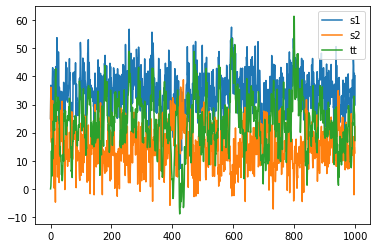

In [9]:
SS1, SS2 ,tt = Gibbs(mu_s1,mu_s2,segma_t,y,n_iterations, co_s,A,co_ts,A_trans,Ms_trans)

plt.plot(SS1,label="s1")
plt.plot(SS2,label="s2")
plt.plot(tt,label="tt")
plt.legend()
plt.show()
################## ASK TA FOR BURNIN 

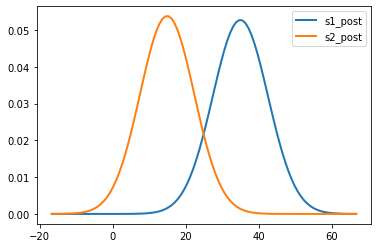

In [10]:
x_post = np.linspace(mu_s1-5*segma_s1, mu_s2+5*segma_s2, 100)
s1_post, s2_post = gauss_posterior(x_post, SS1, SS2)
#print(s1_post)
plt.plot(x_post, s1_post, linewidth=2, label="s1_post")
plt.plot(x_post, s2_post, linewidth=2, label="s2_post")
plt.legend()
plt.show()


The no of itiration10time is 0.009778343999997219


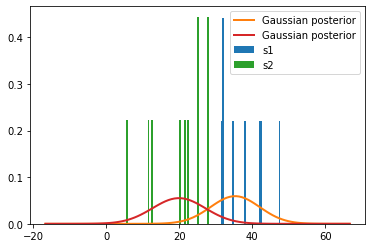


The no of itiration500time is 0.784456954999996


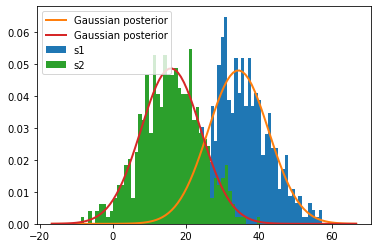


The no of itiration1000time is 1.0555261639999998


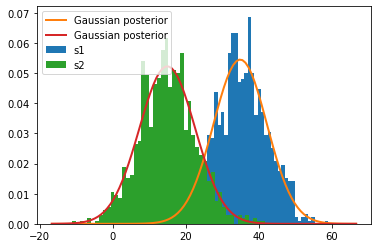


The no of itiration10000time is 9.295204513000002


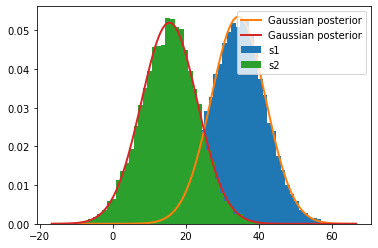

In [11]:
import matplotlib.pyplot as plt
import timeit


#Plot the histogram of the samples generated (after burn-in) together with the
# fitted Gaussian posterior for at least four (4) 
#different numbers of samples and report the time required to draw the samples
def plot_samples_gauss():
  itiration_list = [10,500,1000,10000]
  x_samples = np.linspace(mu_s1-5*segma_s2, mu_s1+5*segma_s2, 100)
  for n in itiration_list :
    start = timeit.default_timer()
    S_plot1, S_plot2 ,tt = Gibbs(mu_s1,mu_s2,segma_t,y,n, co_s,A,co_ts,A_trans,Ms_trans)
    SS_plot1, SS_plot2 = gauss_posterior(x_post, S_plot1, S_plot2)
    stop = timeit.default_timer()
    time_diff =stop - start
    print("\n"+"The no of itiration"+ str(n)+ "time is "+ str(time_diff))
    plt.hist(S_plot1, label="s1", bins =50, density=True)
    plt.plot(x_samples, SS_plot1, linewidth=2, label="Gaussian posterior")
    plt.legend()
    
    plt.hist(S_plot2, label="s2", bins =50, density=True)
    plt.plot(x_samples, SS_plot2, linewidth=2, label="Gaussian posterior")
    plt.legend()
    plt.show()
    #the more samples the more approximation in a better way for mean and varience , 

plot_samples_gauss()

#Q6.Assumed Density Filtering:

The results change when the order of the match is changed

In [12]:
def Gibbs2 (mu_s1, mu_s2, segma_s1, segma_s2, n_iteratations, y = 1):
    
    s_1 = np.zeros(n_iterations)
    s_2 = np.zeros(n_iterations)
    t = np.zeros(n_iterations)

    s_1[0] = 1
    s_2[0] = 1
    
    segma_t = 25/6
    A = np.array([1,-1])
    Ms= np.array([mu_s1,mu_s2])
    A_trans = A[:, None]
    Ms_trans = Ms[:, None]

    co_ts = 5
    co_s = [[segma_s1,0],[0,segma_s2]]


    for i in range(n_iterations-1):
      t[i+1] = t_trunc(i, y, segma_t, s_1, s_2)
      s_1[i+1] , s_2[i+1] = p_st(i, t[i+1], co_s, A, co_ts, A_trans, Ms_trans) 
    return s_1, s_2, t 



In [13]:
def handle_score_v2(winner_team, loser_team, teams_list):

  mu_winner_team = teams_list[winner_team][0]
  mu_loser_team = teams_list[loser_team][0]

  std_winner_team = teams_list[winner_team][1]
  std_loser_team = teams_list[loser_team][1]

  SS1, SS2, t = Gibbs2(mu_winner_team, mu_loser_team, std_winner_team, std_loser_team, n_iteratations = 1000, y=1)
  
  return SS1,SS2,t

In [14]:
##Q6 -- This is the place where we need to read teams.csv files
import pandas as pd
import numpy as np

fileurl = "http://www.it.uu.se/edu/course/homepage/apml/project/SerieA.csv"
data = pd.read_csv(fileurl, na_values='?')

teams = data['team1'].drop_duplicates()
data = data.sample(frac=1).reset_index(drop=True) 
teams_list = dict()

for team in teams:
    teams_list[team] = (mu_s1, segma_s1)

#print(teams_list)
for i in range(data.shape[0]):
  score_diff = data.iloc[i]['score1'] - data.iloc[i]['score2']
  if score_diff > 0:
    winner_team = data.iloc[i]['team1']
    loser_team = data.iloc[i]['team2']
    SS1_q6 , SS2_q6 , t = handle_score_v2(winner_team, loser_team, teams_list)
    teams_list[winner_team] = [np.mean(SS1_q6), np.std(SS1_q6)]
    teams_list[loser_team] = [np.mean(SS2_q6), np.std(SS2_q6)]
    
  elif score_diff < 0:
    winner_team = data.iloc[i]['team2']
    loser_team = data.iloc[i]['team1']
    SS1_q6 , SS2_q6 , t = handle_score_v2(winner_team, loser_team, teams_list)
    teams_list[winner_team] = [np.mean(SS1_q6), np.std(SS1_q6)]
    teams_list[loser_team] = [np.mean(SS2_q6), np.std(SS2_q6)]
  #print(np.mean(SS1_q6) , np.std(SS1_q6) , np.mean(SS2_q6),np.std(SS2_q6))
  
df = pd.DataFrame.from_dict(teams_list, orient='index', columns=['Skill', 'SD'])
df.sort_values(by='Skill', inplace=True, ascending = False)
df['Rank'] = range(1, len(df) + 1)



In [15]:
print(df)

                Skill        SD  Rank
Juventus    29.774812  1.486741     1
Napoli      27.993903  1.454930     2
Inter       27.732052  1.490025     3
Roma        27.366704  1.441693     4
Atalanta    27.274666  1.419350     5
Lazio       25.658455  1.376494     6
Torino      25.563485  1.368980     7
Milan       25.489962  1.394851     8
Sassuolo    24.691184  1.366919     9
Sampdoria   24.590262  1.360865    10
Spal        24.160057  1.401978    11
Udinese     23.917723  1.347249    12
Bologna     22.472534  1.341704    13
Fiorentina  22.449425  1.339612    14
Parma       22.095892  1.324566    15
Cagliari    21.851817  1.287401    16
Genoa       21.789774  1.272252    17
Empoli      21.272053  1.301267    18
Chievo      19.906518  1.250597    19
Frosinone   19.580305  1.261948    20


#Q7.Using the model for predictions :


In [16]:
def prediction_model(m_s1_predict, std_s1_predict, m_s2_predict, std_s2_predict):
  #define model random variables
  S1_predict = np.random.normal(m_s1_predict, std_s1_predict, 100)
  S2_predict = np.random.normal(m_s2_predict, std_s2_predict, 100)
  t_predict =  np.mean(S1_predict - S2_predict)
  y_predict = np.sign(t_predict)

  return y_predict

In [17]:
def get_true_y(data):
  y_true = []
  for i in range(data.shape[0]):
    t_result = data.iloc[i]['score1'] - data.iloc[i]['score2']
    if t_result > 0:
      y_true.append(1)  
    elif t_result < 0:
      y_true.append(-1)
    else:
      y_true.append(0)
  return y_true


def comparison_predicted_and_true_result(y_true, y_predicted):
  numberOfTruePrediction = 0
  for i in range(len(y_true)):
    if y_true[i] == y_predicted[i]:
      numberOfTruePrediction = numberOfTruePrediction + 1
  
  truePredictedPercentageWithDraws = numberOfTruePrediction*100/ len(y_true)
  print("The true rate with draws = " + str(truePredictedPercentageWithDraws))
  truePredictedPercentageWithoutDraws = numberOfTruePrediction*100/ (len(y_true) - y_true.count(0))
  print("The true rate without draws = " + str(truePredictedPercentageWithoutDraws))
        

In [18]:
#note that the result should be
# deterministic and that you are only allowed to use the information of previous matches in this prediction

#Trueskill Model

def Trueskill_model(data):
    true_y = get_true_y(data)
    teams = data['team1'].drop_duplicates()
    teams_list = dict()

    for team in teams:
        teams_list[team] = (mu_s1, segma_s1)

    y_predicted_list = []

    for i in range(data.shape[0]):
        #print(data.iloc[i])
        score_diff = data.iloc[i]['score1'] - data.iloc[i]['score2']
        y_predicted = prediction_model(teams_list[data.iloc[i]['team1']][0], teams_list[data.iloc[i]['team1']][1],
                  teams_list[data.iloc[i]['team2']][0], teams_list[data.iloc[i]['team2']][1])
          
        y_predicted_list.append(y_predicted)
        if score_diff > 0:
          winner_team = data.iloc[i]['team1']
          loser_team = data.iloc[i]['team2']
          SS1_handle , SS2_handle , t = handle_score_v2(winner_team, loser_team, teams_list)
          teams_list[winner_team] = [np.mean(SS1_handle), np.std(SS1_handle)]
          teams_list[loser_team] = [np.mean(SS2_handle), np.std(SS2_handle)]
          

        elif score_diff < 0:
          winner_team = data.iloc[i]['team2']
          loser_team = data.iloc[i]['team1']
          SS1_handle , SS2_handle , t = handle_score_v2(winner_team, loser_team, teams_list)
          teams_list[winner_team] = [np.mean(SS1_handle), np.std(SS1_handle)]
          teams_list[loser_team] = [np.mean(SS2_handle), np.std(SS2_handle)]


    return true_y, y_predicted_list


In [19]:
csv_data = pd.read_csv(fileurl, na_values='?')
true_result , result_predicted_list = Trueskill_model(csv_data)

In [20]:
comparison_predicted_and_true_result(true_result, result_predicted_list)

The true rate with draws = 43.68421052631579
The true rate without draws = 61.029411764705884


#Q9:A message-passing algorithm

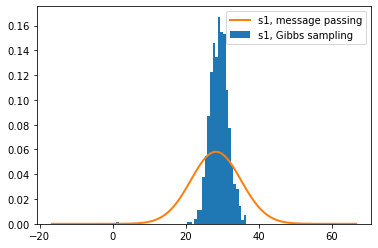

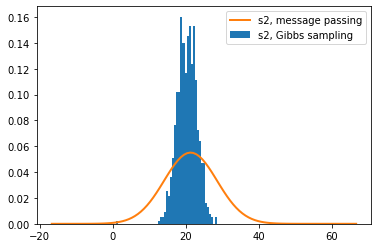

In [27]:
##### Q8 ##### --> Calculate p(t|y)

def multiply_gauss(mean1, var1, mean2, var2):
  var = 1 / (1 / var1 + 1 / var2)
  mean = (mean1 / var1 + mean2 / var2) * var

  return mean, var

def divide_gauss(mean1, var1, mean2, var2):
  return multiply_gauss(mean1, var1, mean2, -var2)


def truncated_gauss(a, b, mean, var):
  scaled_a = (a - mean) / np.sqrt(var)
  scaled_b =(b - mean) / np.sqrt(var)
  truncated_mean = stats.truncnorm.mean(scaled_a, scaled_b, loc=mean, scale=np.sqrt(var))
  truncated_var = stats.truncnorm.var(scaled_a, scaled_b, loc=mean, scale=np.sqrt(var))
   
  return truncated_mean, truncated_var

### MAIN TASK START ###

def message_passing(mean1, var1, mean2, var2, t):
  y = 1 if t > 0 else -1

  #Message Mfs1 from fs1 to node s1
  mean_of_mfs1 = mean1
  var_of_mfs1 = var1

  #Message mfs2 from fs2 to node s2
  mean_of_mfs2 = mean2
  var_of_mfs2 = var2

  #Message ms1 from s1 to factor fs1s2t
  mean_of_ms1 = mean_of_mfs1
  var_of_ms1 = var_of_mfs1

  #Message ms2 from s2 to factor fs1s2t
  mean_of_ms2 = mean_of_mfs2
  var_of_ms2 = var_of_mfs2

  #Message mfs1s2t from factor f1s2t to node t
  mean_of_mfs1s2t = mean_of_ms1 - mean_of_ms2
  var_of_mfs1s2t = var_of_ms1 + var_of_ms2 + segma_t**2

  a1, b1 = 0, 1000
  a2, b2 = -1000, 0

  if y == 1:
    a1, b1 = -1000, 0
    a2, b2 = 0, 1000
  
  mean_pt_s1, var_pt_s1 = truncated_gauss(a1, b1, mean_of_mfs1s2t, var_of_mfs1s2t)
  mean_pt_s2, var_pt_s2 = truncated_gauss(a2, b2, mean_of_mfs1s2t, var_of_mfs1s2t)

  #Message from node t to fs1s2t # Double because results used for f1s2t to s1 and s2
  inverse_fs1s2t_1 = divide_gauss(mean_pt_s1, var_pt_s1, mean_of_mfs1s2t, var_of_mfs1s2t)
  inverse_fs1s2t_2 = divide_gauss(mean_pt_s2, var_pt_s1, var_pt_s2, var_of_mfs1s2t)


  #Message from fs1s2t to s1 and s2
  mean_of_fs1s2t_to_s1 = mean_of_ms2 - mean_pt_s1
  var_of_fs1s2t_to_s1 = var_of_ms2 + var_pt_s1 + segma_t**2
  
  mean_of_fs1s2t_to_s2 = mean_of_ms1 - mean_pt_s2
  var_of_fs1s2t_to_s2 = var_of_ms1 + var_pt_s2 + segma_t**2


  #S-Marginal returning
  mean_ps1, var_ps1 = multiply_gauss(mean_of_mfs1, var_of_mfs1, mean_of_fs1s2t_to_s1, var_of_fs1s2t_to_s1)
  mean_ps2, var_ps2 = multiply_gauss(mean_of_mfs2, var_of_mfs2, mean_of_fs1s2t_to_s2, var_of_fs1s2t_to_s2)

  return mean_ps1, var_ps1, mean_ps2, var_ps2

  
## Intialize variables##
mu_s1_message = 25             # Mu p(s_1)
segma_s1_message = (25/3)**2  # varience p(s_1)
mu_s2_message = 25             # Mu p(s_2)
segma_s2_message = (25/3)**2  # varience p(s_2)
co_ts_message = (25/6)**2     # varience p(t|s_1,s_2)
t_message = 1                # t

segma_s1 = 25/3
mu_s1 = 25


  # PLOTTING
x = np.linspace(mu_s1 - 5*segma_s1, mu_s1 + 5*segma_s1, 100)
mean_ps1, var_ps1, mean_ps2, var_ps2 = message_passing(mu_s1_message, segma_s1_message, mu_s2_message, segma_s2_message, t_message)

s1_norm = np.random.normal(mean_ps1, np.sqrt(var_ps1), 100)
s2_norm = np.random.normal(mean_ps2, np.sqrt(var_ps2), 100)

#Making pdf
mu_s1 = np.mean(s1_norm)
var_s1 = np.var(s1_norm)
mu_s2 = np.mean(s2_norm)
var_s2 = np.var(s2_norm)


s1_pdf = stats.norm.pdf(x, mu_s1, np.sqrt(var_s1))
s2_pdf = stats.norm.pdf(x, mu_s2, np.sqrt(var_s2))

S_plot1, S_plot2, tt = Gibbs(mu_s1,mu_s2,segma_t,y,n_iterations, co_s,A,co_ts,A_trans,Ms_trans)
SS_plot1_q8, SS_plot2_q8 = gauss_posterior(x, S_plot1, S_plot2)


#Make a plot
plt.hist(S_plot1, label="s1, Gibbs sampling", bins =50, density=True)
plt.plot(x, s1_pdf, linewidth=2, label="s1, message passing")
#plt.hist(S_plot1, label="s1, Gibbs sampling", bins =50, density=True)
#plt.hist(S_plot2, label="s2, Gibbs sampling", bins =50, density=True)
plt.legend()
plt.show()

plt.hist(S_plot2, label="s2, Gibbs sampling", bins =50, density=True)
plt.plot(x, s2_pdf, linewidth=2, label="s2, message passing")
#plt.hist(S_plot2, label="s2, Gibbs sampling", bins =50, density=True)
plt.legend()
plt.show()






#Q10:Your own data

In [22]:
hocky = pd.read_csv("hockey.csv")
hocky_proccessed = hocky[["Visitor", "Home","G","G.1"]].rename(columns={'Visitor': 'team1', 'Home': 'team2',
                                                     'G': 'score1','G.1': 'score2'})

true_result_hocky , result_predicted_list_hocky = Trueskill_model(hocky_proccessed)
len(result_predicted_list_hocky)
comparison_predicted_and_true_result(true_result_hocky, result_predicted_list_hocky)

hocky_proccessed.shape[0]

The true rate with draws = 53.89457120377656
The true rate without draws = 53.89457120377656


1271

In [23]:
hocky_proccessed

,team1,team2,score1,score2
0,Anaheim Ducks,San Jose Sharks,5,2
1,Montreal Canadiens,Toronto Maple Leafs,2,3
2,Calgary Flames,Vancouver Canucks,2,5
3,Boston Bruins,Washington Capitals,0,7
4,Boston Bruins,Buffalo Sabres,4,0
...,...,...,...,...
1266,Carolina Hurricanes,Philadelphia Flyers,4,3
1267,New York Rangers,Pittsburgh Penguins,4,3
1268,Colorado Avalanche,San Jose Sharks,2,5
1269,Vancouver Canucks,St. Louis Blues,2,3


In [36]:
### Q11 ####

import random


#mu_s1 = 25
#segma_s1 = (25/3)

def prediction_model_new(m_s1_predict, std_s1_predict, m_s2_predict, std_s2_predict, i):
  #define model random variables

  S1_predict = np.random.normal(m_s1_predict, std_s1_predict, 100)
  S2_predict = np.random.normal(m_s2_predict, std_s2_predict, 100)
  t_predict =  np.mean(S1_predict - S2_predict)

  rand = random.randint(0,2) + 1

  if i % rand == 0 and abs(t_predict < 0.1):
    return 0
  else:
    return np.sign(t_predict)



def Trueskill_model_new(data):
    true_y = get_true_y(data)
    teams = data['team1'].drop_duplicates()
    teams_list = dict()

    for team in teams:
        teams_list[team] = (mu_s1, segma_s1)

    y_predicted_list = []

    for i in range(data.shape[0]):
        #print(data.iloc[i])
        score_diff = data.iloc[i]['score1'] - data.iloc[i]['score2']
        y_predicted = prediction_model_new(teams_list[data.iloc[i]['team1']][0], teams_list[data.iloc[i]['team1']][1],
                  teams_list[data.iloc[i]['team2']][0], teams_list[data.iloc[i]['team2']][1], i)
          
        y_predicted_list.append(y_predicted)
        if score_diff > 0:
          winner_team = data.iloc[i]['team1']
          loser_team = data.iloc[i]['team2']
          SS1_handle , SS2_handle , t = handle_score_v2(winner_team, loser_team, teams_list)
          teams_list[winner_team] = [np.mean(SS1_handle), np.std(SS1_handle)]
          teams_list[loser_team] = [np.mean(SS2_handle), np.std(SS2_handle)]
          

        elif score_diff < 0:
          winner_team = data.iloc[i]['team2']
          loser_team = data.iloc[i]['team1']
          SS1_handle , SS2_handle , t = handle_score_v2(winner_team, loser_team, teams_list)
          teams_list[winner_team] = [np.mean(SS1_handle), np.std(SS1_handle)]
          teams_list[loser_team] = [np.mean(SS2_handle), np.std(SS2_handle)]


    return true_y, y_predicted_list


In [37]:
csv_data = pd.read_csv(fileurl, na_values='?')
true_result , result_predicted_list = Trueskill_model_new(csv_data)

In [ ]:
comparison_predicted_and_true_result(true_result, result_predicted_list)